# Importing Necessory Libraries

In [1]:
#DataFrame Manipulation and Analysis Libraries
import pandas as pd 
import numpy as np

#Data visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import seaborn as sns 

# Library to Filter Warnings
import warnings
warnings.filterwarnings('ignore')

#importing machine learning models
from sklearn.linear_model import LogisticRegression,Lasso,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

# Data Preparation libraries
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder

#Model evaluation Metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

# Feature Decomposition Library
from sklearn.feature_selection import RFE

# Learning Curve Analysis Library
from sklearn.model_selection import learning_curve

# Loading Dataset

In [2]:
df = pd.read_excel('Rocket Loans.xlsx')
df.head()

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Problem Statement
- To predict Loan Approval (1 or 0) based on applicant's details.

# Exploratory Data Analysis (EDA)

In [3]:
# Dropping the unwanted column:
df.drop('Loan_ID', inplace=True, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          601 non-null    object 
 1   Age                          614 non-null    int64  
 2   Married                      611 non-null    object 
 3   No. of People in the Family  599 non-null    object 
 4   Qualification                614 non-null    object 
 5   Self_Employed                582 non-null    object 
 6   Loan_Bearer_Income           614 non-null    int64  
 7   Loan_Cobearer_Income         614 non-null    float64
 8   Amount Disbursed             593 non-null    float64
 9   Loan_Tenure                  600 non-null    float64
 10  Credit_Score                 564 non-null    float64
 11  Location_type                614 non-null    object 
 12  Loan_Status                  614 non-null    object 
dtypes: float64(4), int64

Analysis :
1. Dataset contain 14 columns in that 8 are catagorical and 6 are numerical.
2. Data set contain nll values in columns : sex,Married,No. of People in the Family,Self_Employed,Amount Disbursed,Loan_Tenure,Credit_Score.

## Null Values Imputation

In [7]:
df['Sex'].fillna(df['Sex'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['No. of People in the Family'].fillna(df['No. of People in the Family'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Amount Disbursed'].fillna(df['Amount Disbursed'].mean(), inplace = True)
df['Loan_Tenure'].fillna(df['Loan_Tenure'].mean(), inplace = True)
df['Credit_Score'].fillna(df['Credit_Score'].mean(), inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          614 non-null    object 
 1   Age                          614 non-null    int64  
 2   Married                      614 non-null    object 
 3   No. of People in the Family  614 non-null    object 
 4   Qualification                614 non-null    object 
 5   Self_Employed                614 non-null    object 
 6   Loan_Bearer_Income           614 non-null    int64  
 7   Loan_Cobearer_Income         614 non-null    float64
 8   Amount Disbursed             614 non-null    float64
 9   Loan_Tenure                  614 non-null    float64
 10  Credit_Score                 614 non-null    float64
 11  Location_type                614 non-null    object 
 12  Loan_Status                  614 non-null    object 
dtypes: float64(4), int64

In [9]:
df['Credit_Score'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_Score, dtype: int64

In [10]:
df['Loan_Tenure'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Tenure, dtype: int64

### Encoing Catagorical Features

In [11]:
def encoder(cols):
    for col in cols:
        labelencoder = LabelEncoder()
        df[col] = labelencoder.fit_transform(df[col])

In [12]:
#Replacing no. o people in family #+ with 4
df['No. of People in the Family'] = df['No. of People in the Family'].replace({'3+':4})

In [13]:
encoder(['Sex','Married','Qualification','Self_Employed','Loan_Status','Location_type'])

## Descriptive Analysis

In [14]:
df.describe()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,38.469055,0.653094,0.827362,0.218241,0.133550,5403.459283,1621.245798,146.347386,342.000000,0.842199,1.037459,0.687296
std,0.386497,8.124732,0.476373,1.212833,0.413389,0.340446,6109.041673,2926.248369,84.051763,64.372489,0.349681,0.787482,0.463973
min,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,32.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,39.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.500000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,45.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,52.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Analysis:
1. Loan_Bearer_Income,Loan_Cobearer_Income tends to have outliers.
2. Loan_Bearer_Income,Loan_Cobearer_Income might have outliers on upper whisker.

### Building Custom Summery function for indepth EDA report

In [15]:
def custom_summary(mydf):
    cols = []
    for i in df.columns:
        if mydf[i].dtype != object:
            cols.append(i)
    result = pd.DataFrame(columns = cols,index=['datatype','count','min','Q1','Q2','Q3','Max','Mean','stddev','skew','kurt','range','IQR','skew_comment','kurt_comment','outlier_comment'])
    for i in result.columns:
        result.loc['datatype',i] = mydf[i].dtype
        result.loc['count',i] = mydf[i].count()
        result.loc['min',i] = mydf[i].min()
        result.loc['Q1',i] = mydf[i].quantile(0.25)
        result.loc['Q2',i] = mydf[i].quantile(0.50)
        result.loc['Q3',i] = mydf[i].quantile(0.75)
        result.loc['Max',i] = mydf[i].quantile(1)
        result.loc['Mean',i] = round(mydf[i].mean(),2)
        result.loc['stddev',i] = round(mydf[i].std(),2)
        result.loc['skew',i] = round(mydf[i].skew(),2)
        result.loc['kurt',i] = round(mydf[i].kurt(),2)
        result.loc['range',i] = mydf[i].quantile(1)-mydf[i].min()
        result.loc['IQR',i] = mydf[i].quantile(0.75)-mydf[i].quantile(0.25)
        
        #Adding Comments for skewness
        if result.loc['skew',i] < -1:
            sk_label = 'Highly negatively skewed'
        elif -1 < result.loc['skew',i] <= -0.5:
            sk_label = 'Moderately negatively skewed'
        elif -0.5 < result.loc['skew',i] <= 0:
            sk_label = 'Approximately normally distributed(-ve)'
        elif 0 < result.loc['skew',i] <= 0.5:
            sk_label = 'Approximately normally distributed(+ve)'
        elif 0.5 < result.loc['skew',i] <= 1:
            sk_label = 'Moderately Positively Skewd'
        elif result.loc['skew',i] > 1:
            sk_label = 'Highly Positively Skewd'
        else:
            sk_label = 'error'
        result.loc['skew_comment',i] = sk_label
        
        #Adding Comments for Kurtosis
        if result.loc['kurt',i] < -1:
            ku_label = 'Highly Platykurtic'
        elif -1 < result.loc['kurt',i] <= -0.5:
            ku_label = 'Moderately Platykurtic'
        elif -0.5 < result.loc['kurt',i] <= 0.5:
            ku_label = 'Mesokurtic'
        elif 0.5 < result.loc['kurt',i] <= 1:
            ku_label = 'Moderately Leptokurtic'
        elif result.loc['kurt',i] > 1:
            ku_label = 'Highly Leptokurtic'
        else:
            ku_label = 'error'
        result.loc['kurt_comment',i] = ku_label
        
        #adding comments for outliers
        LW = result.loc['Q1',i] - (1.5*result.loc['IQR',i])
        UW = result.loc['Q3',i] + (1.5*result.loc['IQR',i])
        
        if len([x for x in mydf[i] if x < LW or x> UW]) > 0:
            outlier_lable = "Have Outliers"
        else:
            outlier_lable = "No Outliers"
            
        result.loc['outlier_comment',i] = outlier_lable
        
    return result

In [16]:
custom_summary(df)

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
datatype,int32,int64,int32,int64,int32,int32,int64,float64,float64,float64,float64,int32,int32
count,614,614,614,614,614,614,614,614,614,614,614,614,614
min,0,25,0,0,0,0,150,0.0,9.0,12.0,0.0,0,0
Q1,1.0,32.0,0.0,0.0,0.0,0.0,2877.5,0.0,100.25,360.0,1.0,0.0,0.0
Q2,1.0,39.0,1.0,0.0,0.0,0.0,3812.5,1188.5,128.5,360.0,1.0,1.0,1.0
Q3,1.0,45.0,1.0,1.0,0.0,0.0,5795.0,2297.25,164.75,360.0,1.0,2.0,1.0
Max,1.0,52.0,1.0,4.0,1.0,1.0,81000.0,41667.0,700.0,480.0,1.0,2.0,1.0
Mean,0.82,38.47,0.65,0.83,0.22,0.13,5403.46,1621.25,146.35,342.0,0.84,1.04,0.69
stddev,0.39,8.12,0.48,1.21,0.41,0.34,6109.04,2926.25,84.05,64.37,0.35,0.79,0.46
skew,-1.65,-0.01,-0.64,1.46,1.37,2.16,6.54,7.49,2.73,-2.39,-1.96,-0.07,-0.81


Analysis:
1. sex,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,loan_Tenure,Credit_Score has outliers.
2. sex,No. of People in the Family,Qualification,Self_Employed,Credit_Score contain value 0 and 1 so we need consider this columns for outlier treatment

## Checking for Outlier using boxplot

In [17]:
def replace_outlier(mydf,col,method = 'Quartile', stratergy = 'median'):
    if method == 'Quartile':
        Q1 = mydf[col].quantile(0.25)
        Q2 = mydf[col].quantile(0.50)
        Q3 = mydf[col].quantile(0.75)
        IQR = Q3 - Q1
        LW = Q1 - (1.5 * IQR)
        UW = Q3 + (1.5 * IQR)
    elif method == 'std':
        mean = mydf[col].mean()
        std = mydf[col].std()
        LW = mean - (2 * std)
        UW = mean + (2 * std)
    else:
        print('Pass a corect method')
#printing all the outliers 
    outliers = mydf.loc[(mydf[col] < LW) | (mydf[col] > UW),col]
    outliers_density = round(len(outliers) / len(mydf),2)
    if len(outliers) == 0:
        print(f'feature {col} does not have any outliers')
    else:
        print(f'feature {col} has otliers')
        print(f'total no of outliers in {col} is {len(outliers)}')
        print(f'outliers percentage in {col} is {outliers_density*100}%')
    
    if stratergy == 'median':
#     mydf.loc[(mydf[col] < LW), col] = Q2 
#     mydf.loc[(mydf[col] > UW), col] = Q2 
        mydf.loc[(mydf[col] < LW), col] = Q1 
        mydf.loc[(mydf[col] > UW), col] = Q3 
    elif stratergy == 'mean':
        mydf.loc[(mydf[col] < LW), col] = mean 
        mydf.loc[(mydf[col] > UW), col] = mean
    else:
        print('pass the correct stratergy')
        
    return mydf

In [18]:
def odt_plots(mydf,col):
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    #discriptive statistics box plot
    sns.boxplot(mydf[col],ax = ax1)
    ax1.set_title(col + ' boxplot')
    ax1.set_xlabel('values')
    ax1.set_ylabel('boxplot')
    #replacing the outliers
    mydf_out = replace_outlier(mydf,col)
    #plotting box plot without outliers
    sns.boxplot(mydf_out[col],ax = ax2)
    ax2.set_title(col + ' boxplot')
    ax2.set_xlabel('values')
    ax2.set_ylabel('boxplot')
    plt.show()

In [19]:
df.columns

Index(['Sex', 'Age', 'Married', 'No. of People in the Family', 'Qualification',
       'Self_Employed', 'Loan_Bearer_Income', 'Loan_Cobearer_Income',
       'Amount Disbursed', 'Loan_Tenure', 'Credit_Score', 'Location_type',
       'Loan_Status'],
      dtype='object')

In [20]:
out_df = df[['Loan_Bearer_Income', 'Loan_Cobearer_Income','Amount Disbursed']]

feature Loan_Bearer_Income has otliers
total no of outliers in Loan_Bearer_Income is 50
outliers percentage in Loan_Bearer_Income is 8.0%


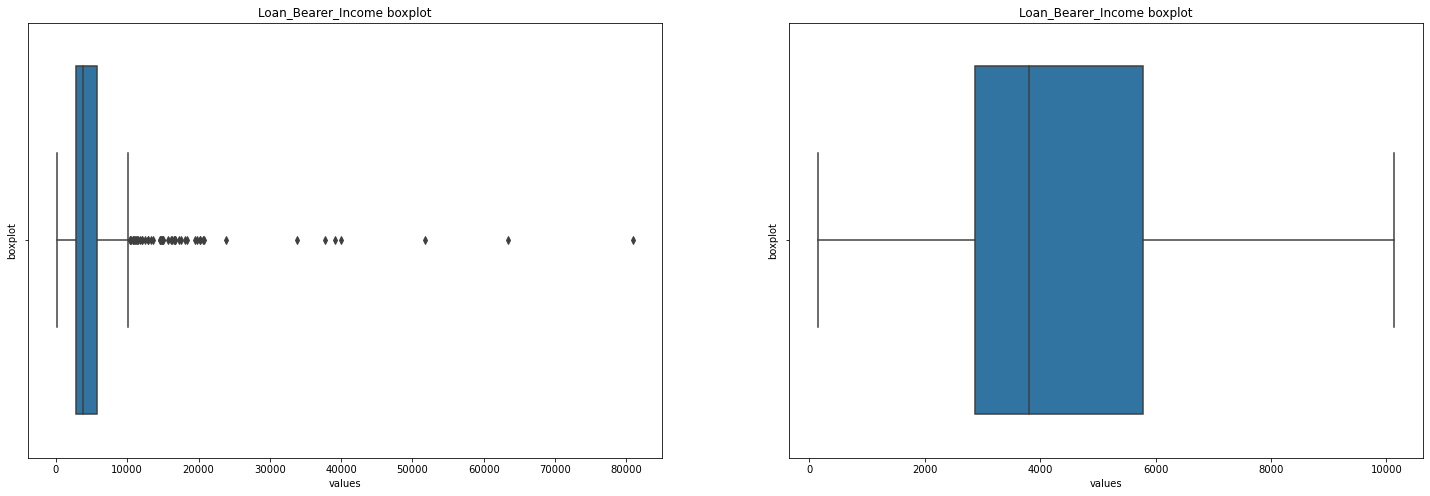

feature Loan_Cobearer_Income has otliers
total no of outliers in Loan_Cobearer_Income is 18
outliers percentage in Loan_Cobearer_Income is 3.0%


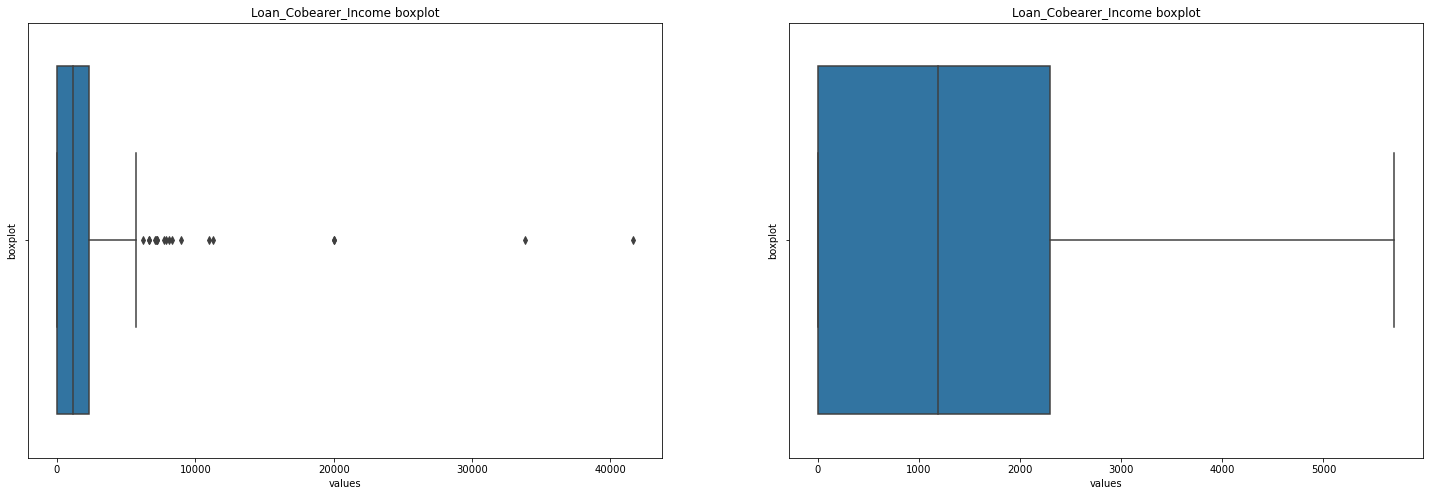

feature Amount Disbursed has otliers
total no of outliers in Amount Disbursed is 41
outliers percentage in Amount Disbursed is 7.000000000000001%


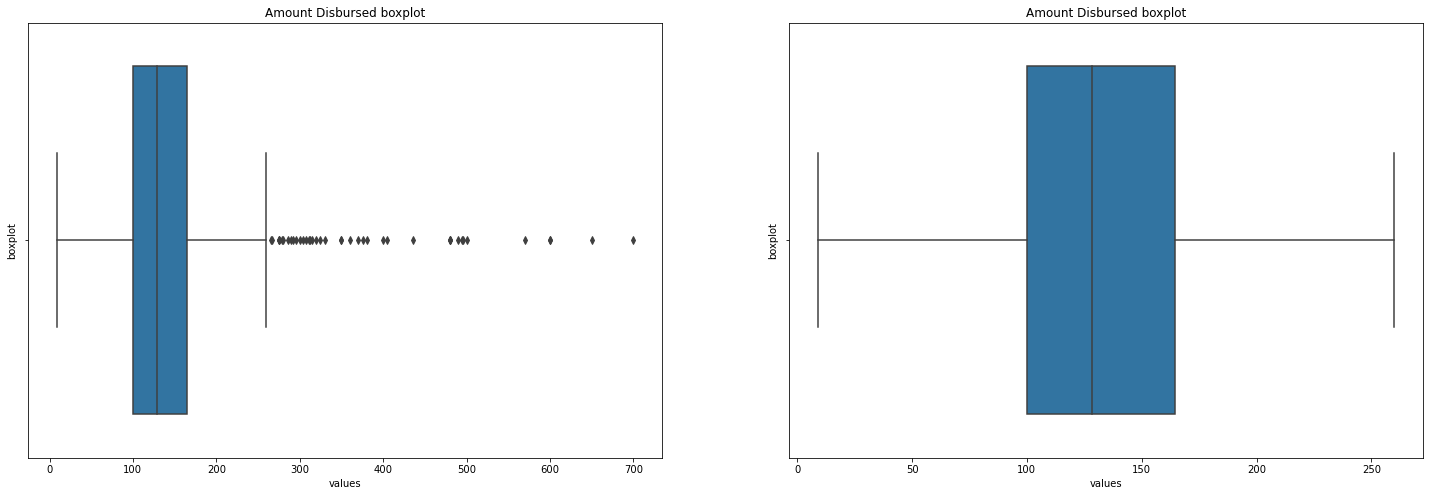

In [21]:
for col in out_df.columns:
    odt_plots(df,col)

# Model Building
1. Using train test split
2. Cross Validation
3. Hyperparameter Tuning

In [22]:
def train_and_test_split(data,t_col,testsize=0.3):
    x = data.drop(t_col,axis=1)
    y = data[t_col]
    return train_test_split(x,y,test_size = testsize,random_state = 40)

In [23]:
def model_builder(x,y,model_name,estimators):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 1)
    model = model_name
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    result = accuracy_score(y_test,y_pred)
    return [estimators,result]

In [24]:
 def master_mb(x,y):
        list_model = [LogisticRegression(),DecisionTreeClassifier(),RidgeClassifier(),SVC(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),XGBClassifier()]
        result = []
        model_name = []
        for model in list_model:
            temp_result = model_builder(x,y,model,estimators = type(model).__name__)
            result.append(temp_result)
        return result

In [25]:
master_mb(x=df.drop('Loan_Status',axis=1),y=df['Loan_Status'])

[['LogisticRegression', 0.7891891891891892],
 ['DecisionTreeClassifier', 0.6810810810810811],
 ['RidgeClassifier', 0.7891891891891892],
 ['SVC', 0.6702702702702703],
 ['KNeighborsClassifier', 0.6432432432432432],
 ['AdaBoostClassifier', 0.7837837837837838],
 ['GradientBoostingClassifier', 0.8],
 ['RandomForestClassifier', 0.7891891891891892],
 ['XGBClassifier', 0.7621621621621621]]

In [26]:
Master_MB = pd.DataFrame(master_mb(x = df.drop('Loan_Status',axis=1), y = df['Loan_Status']),columns=['Model Names','Accuraccy']).sort_values(by=['Accuraccy'],ascending = False)
Master_MB = Master_MB.reset_index(drop=True)
Master_MB

,Model Names,Accuraccy
0,GradientBoostingClassifier,0.800000
1,LogisticRegression,0.789189
2,RidgeClassifier,0.789189
3,AdaBoostClassifier,0.783784
4,RandomForestClassifier,0.783784
5,XGBClassifier,0.762162
6,DecisionTreeClassifier,0.713514
7,SVC,0.670270
8,KNeighborsClassifier,0.643243


### Cross Validation

In [27]:
stf = StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
stf.get_n_splits(X=df.drop(['Loan_Status'],axis=1),y=df['Loan_Status'])

10

In [28]:
X=df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']

In [29]:
def startifiedKfoldcv(x,y,fold=10):
    score_lr = LogisticRegression()
    score_rg = RidgeClassifier()
    score_dt = DecisionTreeClassifier()
    score_kn = KNeighborsClassifier()
    score_sv = SVC()
    score_rf = RandomForestClassifier()
    score_ab = AdaBoostClassifier()
    score_gb = GradientBoostingClassifier()
    score_xg = XGBClassifier()
    scores = [score_lr,score_rg,score_dt,score_kn,score_kn,score_sv,score_rf,score_ab,score_gb,score_xg]
    score_mean = []
    for train_index,test_index in stf.split(X=X,y=Y):
        #print('train indices:',train_index,'test_indice',test_index)
        x1_train,x1_test = X.iloc[train_index],X.iloc[test_index]
        y1_train,y1_test = Y.iloc[train_index],Y.iloc[test_index]
        for model in scores:
            model.fit(x1_train,y1_train)
            y1_pred = model.predict(x1_test)
            acc = accuracy_score(y1_test,y1_pred)
            score_mean.append(acc)
    model_names = ['LogisticRegression','RidgeClassifier','DecisionTreeClassifier','KNeighborsClassifier','SVC','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
    
    result = []
    for i in range(len(model_names)):
        score = score_mean[i]
        m_names = model_names[i]
        temp = [m_names,score]
        result.append(temp)
    kfold_df = pd.DataFrame(result,columns = ['model_names','cv_score']).sort_values(by=['cv_score'], ascending=False)
    kfold_df = kfold_df.reset_index(drop=True)
    return kfold_df
        


In [30]:
startifiedKfoldcv(df.drop('Loan_Status',axis = 1),df['Loan_Status'])

,model_names,cv_score
0,RidgeClassifier,0.854839
1,AdaBoostClassifier,0.854839
2,LogisticRegression,0.838710
3,XGBClassifier,0.838710
4,GradientBoostingClassifier,0.822581
5,DecisionTreeClassifier,0.806452
6,RandomForestClassifier,0.693548
7,KNeighborsClassifier,0.645161
8,SVC,0.645161


### HyperParameter Tuning

In [31]:
def tuning(x,y,fold = 10):
    
    # Parameter Grids for Different Models
    
    param_rd = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_dtr = {'criterion':['gini','entropy','log_loss'],'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt']}
    param_knr = {'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
    param_svr = {'gamma':['scale','auto'],'C':[0.1,1,1.5,2]}
    param_rf = {'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt'],'n_estimators':[50,100,150,200]}
    param_ad = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.5,0.7,1,5,10,20,50,100]}
    param_gb = {'n_estimators':[50,100,150,200],'loss':['log_loss','deviance','exponential']}
    param_xgb = {'eta':[0.1,0.5,0.7,1,5,10 ,20,50,100],'max_depth':[3,5,7,9,11],'gamma':[0,10,20,50,100],'reg_lambda':[0,1,3,5,7,10],'alpha':[0,1,3,5,7,10]}
    
    # Creating Model Object
    tune_rd = RandomizedSearchCV(RidgeClassifier(),param_rd,cv = fold)
    tune_dtr = RandomizedSearchCV(DecisionTreeClassifier(),param_dtr,cv = fold)
    tune_knr = RandomizedSearchCV(KNeighborsClassifier(),param_knr,cv = fold)
    tune_svr = RandomizedSearchCV(SVC(),param_svr,cv = fold)
    tune_rf = RandomizedSearchCV(RandomForestClassifier(),param_rf,cv = fold)
    tune_ad = RandomizedSearchCV(AdaBoostClassifier(),param_ad,cv = fold)
    tune_gb = RandomizedSearchCV(GradientBoostingClassifier(),param_gb,cv = fold)
    tune_xgb = RandomizedSearchCV(XGBClassifier(),param_xgb,cv = fold)
    
    # Model Fitting
    tune_rd.fit(x,y)
    tune_dtr.fit(x,y)
    tune_knr.fit(x,y)
    tune_svr.fit(x,y)
    tune_rf.fit(x,y)
    tune_ad.fit(x,y)
    tune_gb.fit(x,y)
    tune_xgb.fit(x,y)
    
    tune = [tune_rd,tune_dtr,tune_knr,tune_svr,tune_rf,tune_ad,tune_gb,tune_xgb]
    #tune = [tune_knr,tune_ad,tune_xgb]
    models = ['RidgeClassifer','DecisionTreeClassifier','RidgeClassifier','KNeighborsClassifier','SVC','RandomForestClassifier','AdaBoostClassifier','GradientBoostClassifier','XGBClassifier']
    #models = ['KNN Regressor','AdaBoost Regressor','XGB Regressor']
    for i in range(len(tune)):
        print('Model :',models[i])
        print('Best Params :',tune[i].best_params_)
    

In [32]:
tuning(df.drop('Loan_Status',axis = 1),df['Loan_Status'])

Model : RidgeClassifer
Best Params : {'alpha': 0.1}
Model : DecisionTreeClassifier
Best Params : {'max_features': 7, 'max_depth': 3, 'criterion': 'gini'}
Model : RidgeClassifier
Best Params : {'weights': 'uniform', 'algorithm': 'auto'}
Model : KNeighborsClassifier
Best Params : {'gamma': 'scale', 'C': 0.1}
Model : SVC
Best Params : {'n_estimators': 150, 'max_features': 'auto', 'max_depth': 5}
Model : RandomForestClassifier
Best Params : {'n_estimators': 200, 'learning_rate': 0.1}
Model : AdaBoostClassifier
Best Params : {'n_estimators': 50, 'loss': 'exponential'}
Model : GradientBoostClassifier
Best Params : {'reg_lambda': 10, 'max_depth': 11, 'gamma': 20, 'eta': 0.7, 'alpha': 5}


In [33]:
def CV_Post_HPT(x,y,fold = 10):
    score_lr = cross_val_score(LogisticRegression(),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeClassifier(criterion = 'gini',max_depth = 5,max_features = 4),x,y,cv = fold)
    score_rid = cross_val_score(RidgeClassifier(alpha = 1e-05),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsClassifier(weights = 'uniform',algorithm = 'auto'),x,y,cv = fold)
    score_svr = cross_val_score(SVC(gamma = 'scale',C = 0.1),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestClassifier(max_depth = 5,max_features = 7,n_estimators = 50),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostClassifier(n_estimators = 50,learning_rate = 0.1),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingClassifier(n_estimators = 50,loss ='deviance'),x,y,cv = fold)
    score_xgb = cross_val_score(XGBClassifier(eta =0.5,max_depth = 9,gamma = 10,reg_lambda = 3,alpha = 7),x,y,cv = fold)
    
    model_names = ['LogisticRegression','DecisionTreeClassifier','RidgeClassifier','KNeighborsClassifier','SVC','RandomForestClassifier','AdaBoostClassifier','GradientBoostClassifier','XGBClassifier']
    scores = [score_lr,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    KFold_df = pd.DataFrame(result,columns = ['Model Name','CV Score','CV Stdev']).sort_values(by = 'CV Score',ascending = False)  
    KFold_df = KFold_df.reset_index(drop=True)
    return KFold_df

In [34]:
CV_Post_HPT(df.drop('Loan_Status',axis = 1),df['Loan_Status'])

,Model Name,CV Score,CV Stdev
0,RidgeClassifier,0.809572,0.033478
1,AdaBoostClassifier,0.809572,0.033478
2,XGBClassifier,0.809572,0.033478
3,RandomForestClassifier,0.807959,0.042276
4,GradientBoostClassifier,0.798096,0.034065
5,LogisticRegression,0.796483,0.033136
6,DecisionTreeClassifier,0.768985,0.054875
7,SVC,0.687308,0.005314
8,KNeighborsClassifier,0.633607,0.023472


# Clustering
- Using Clustering to check if it can help us to improve Accuraccy

In [35]:
df.columns

Index(['Sex', 'Age', 'Married', 'No. of People in the Family', 'Qualification',
       'Self_Employed', 'Loan_Bearer_Income', 'Loan_Cobearer_Income',
       'Amount Disbursed', 'Loan_Tenure', 'Credit_Score', 'Location_type',
       'Loan_Status'],
      dtype='object')

In [36]:
x = df[['Sex', 'Age', 'Married', 'No. of People in the Family', 'Qualification','Self_Employed', 'Loan_Bearer_Income', 'Loan_Cobearer_Income','Amount Disbursed', 'Loan_Tenure', 'Credit_Score', 'Location_type','Loan_Status']].values

Text(0, 0.5, 'WCCS')

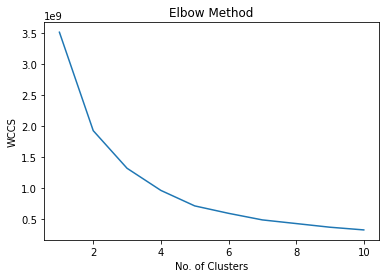

In [37]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCCS')

<AxesSubplot:xlabel='Loan_Bearer_Income', ylabel='Loan_Status'>

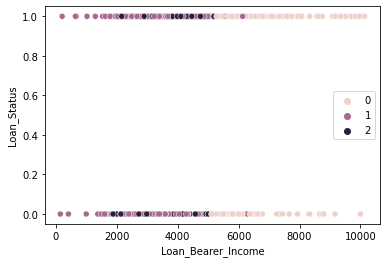

In [38]:
labels = KMeans(n_clusters=3,random_state=42)
cluster = labels.fit_predict(df.drop('Loan_Status',axis=1))
sns.scatterplot(x=df['Loan_Bearer_Income'],y=df['Loan_Status'],hue = cluster)

In [39]:
def clustering(x,tcol,cluster):
    column = list(set(list(x.columns)) - set(list('Loan_Status')))
    #column = list(x.columns)
    R = int(len(column)/2) 
    if len(column) % 2 == 0:
        R = R
    else:
        R += 1
    f,ax = plt.subplots(R,2,figsize = (15,15))
    a = 0
    for row in range(R):
        for col in range(2):
            if a != len(column):
                ax[row][col].scatter(x[tcol],x[column[a]],c = cluster)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a += 1 
            

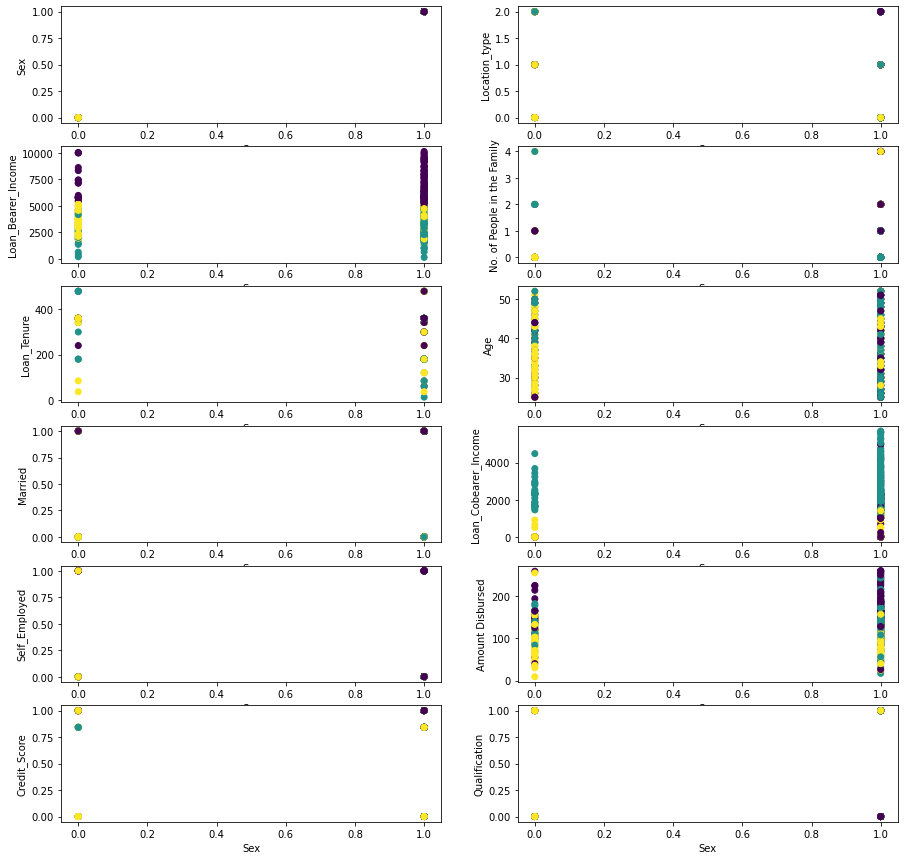

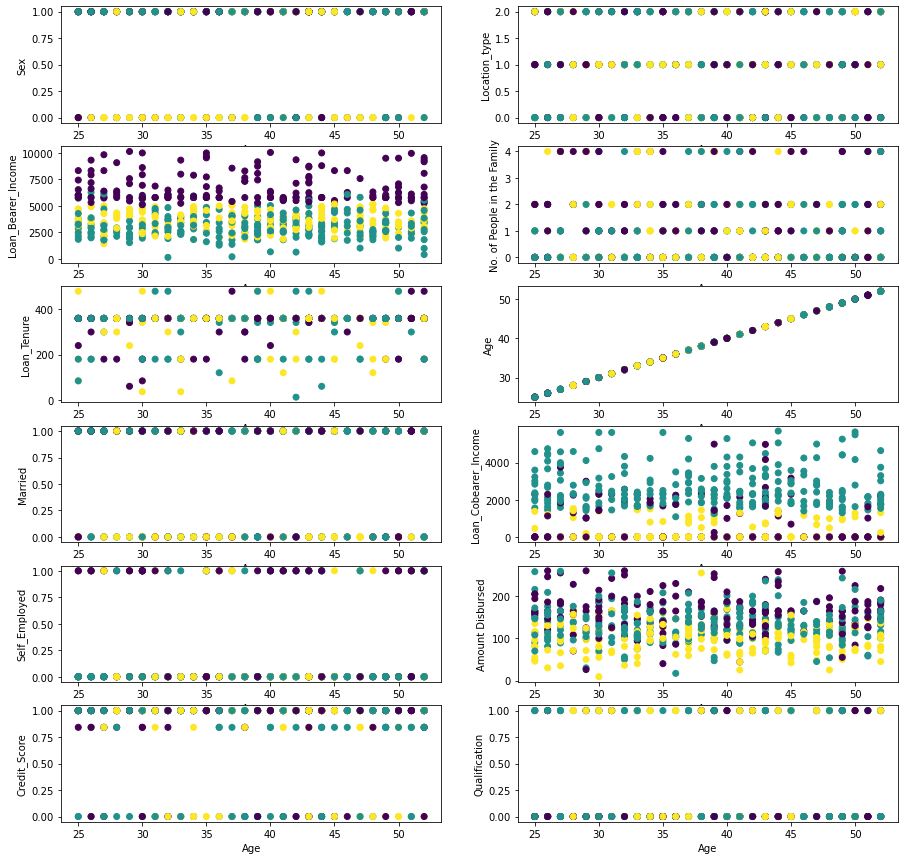

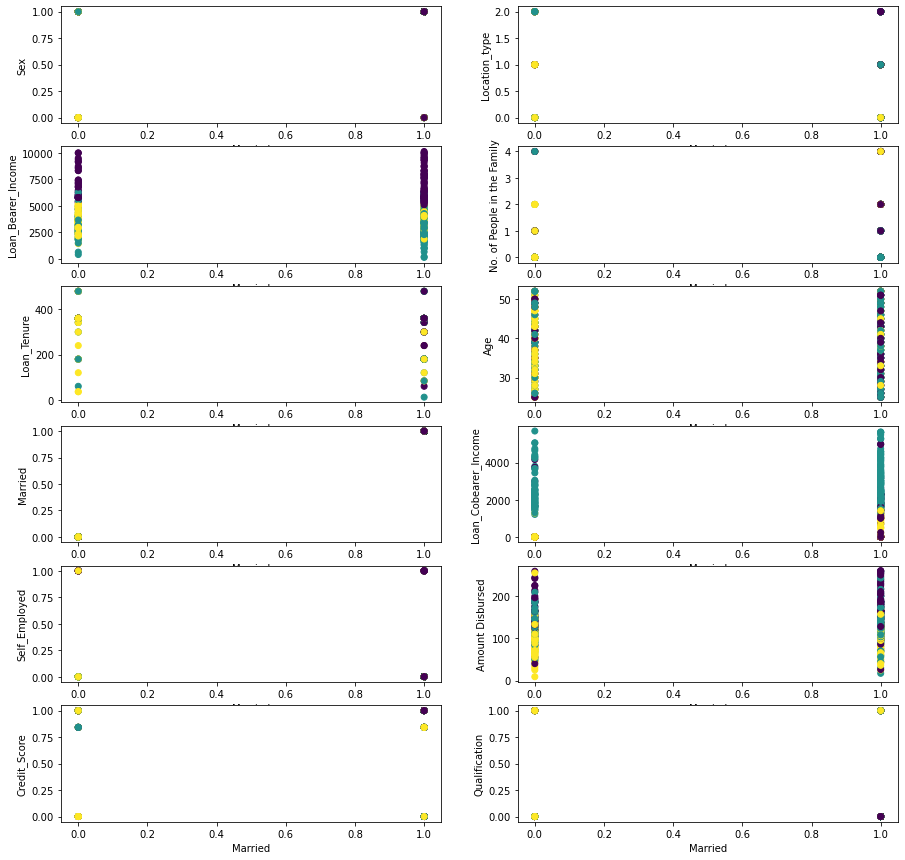

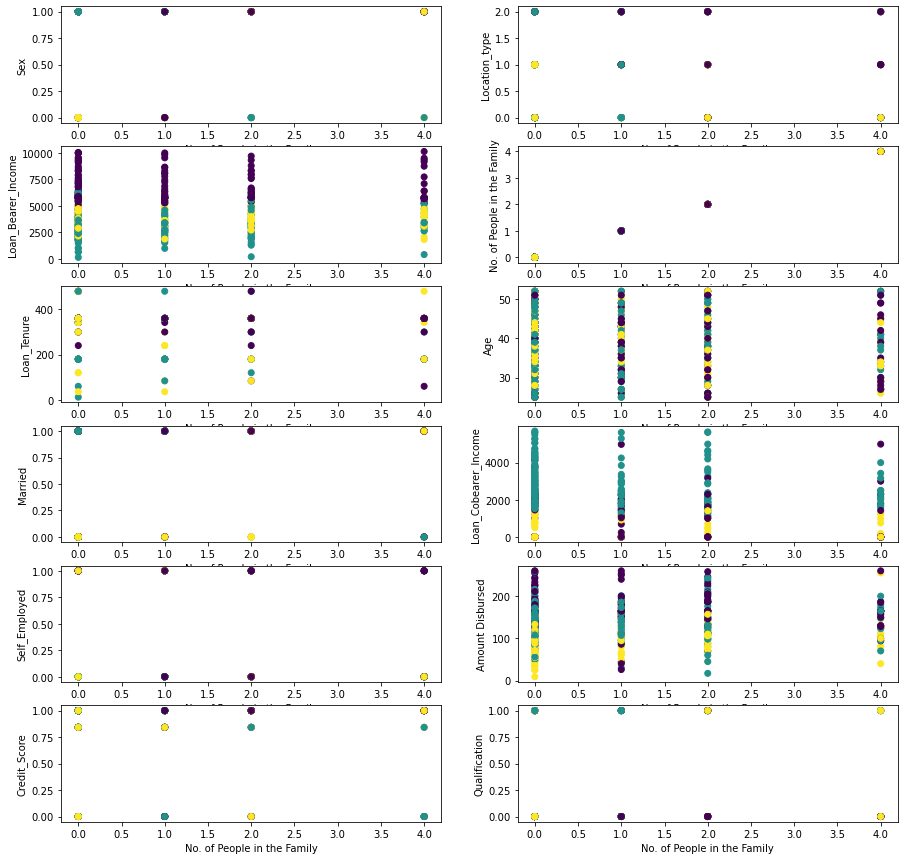

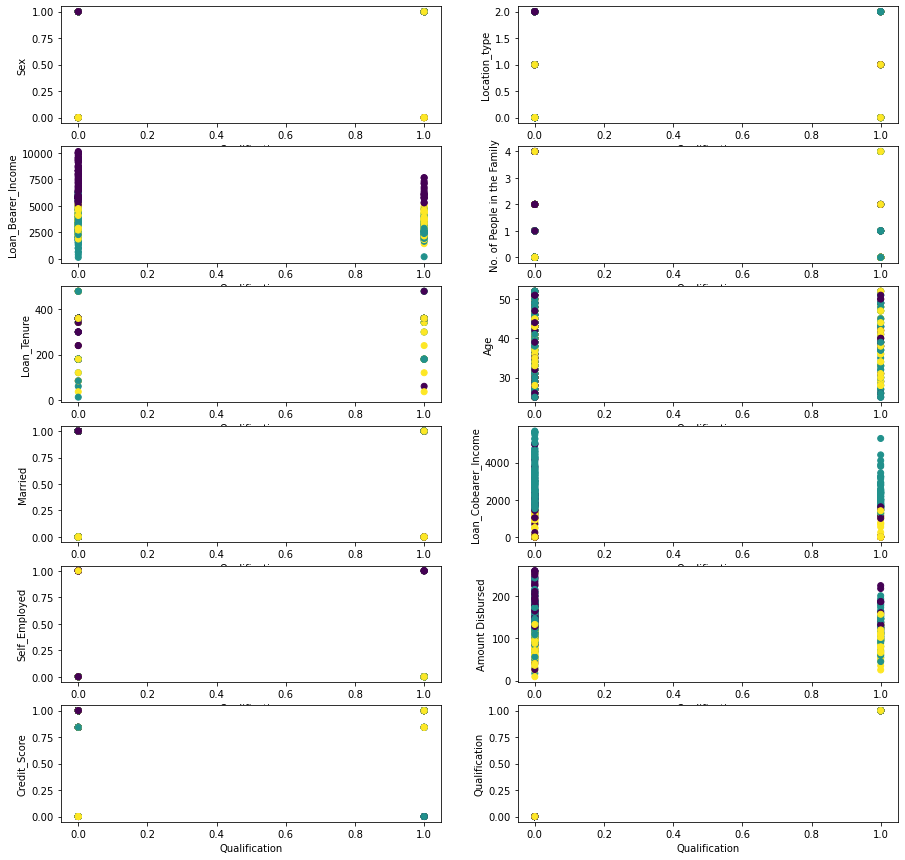

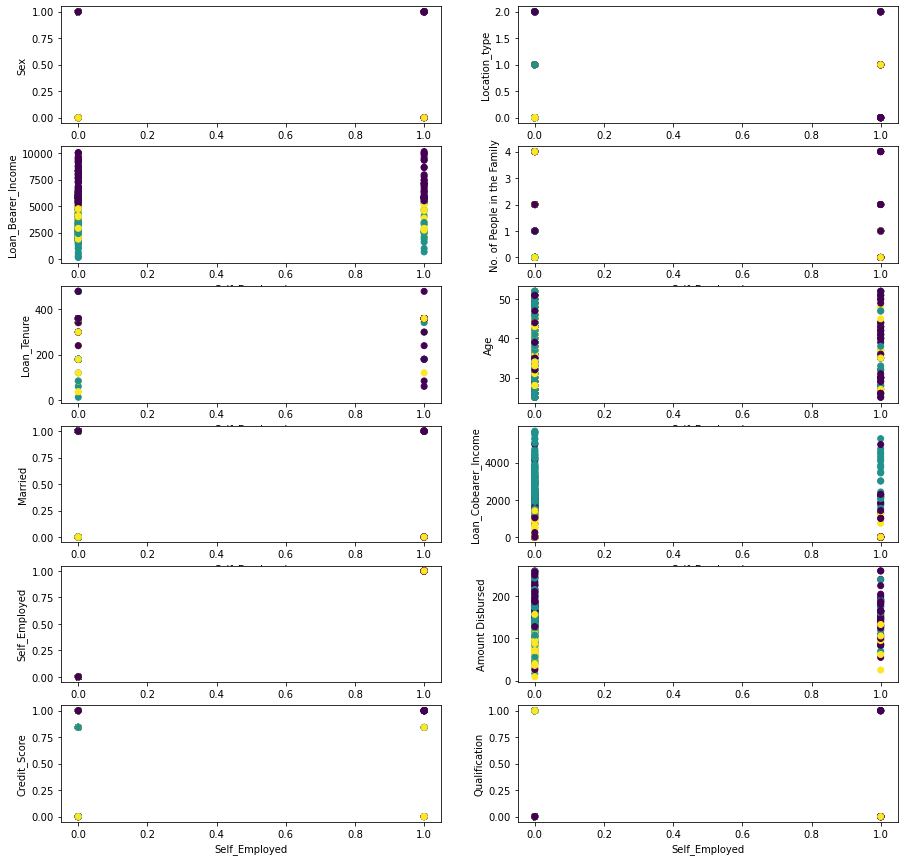

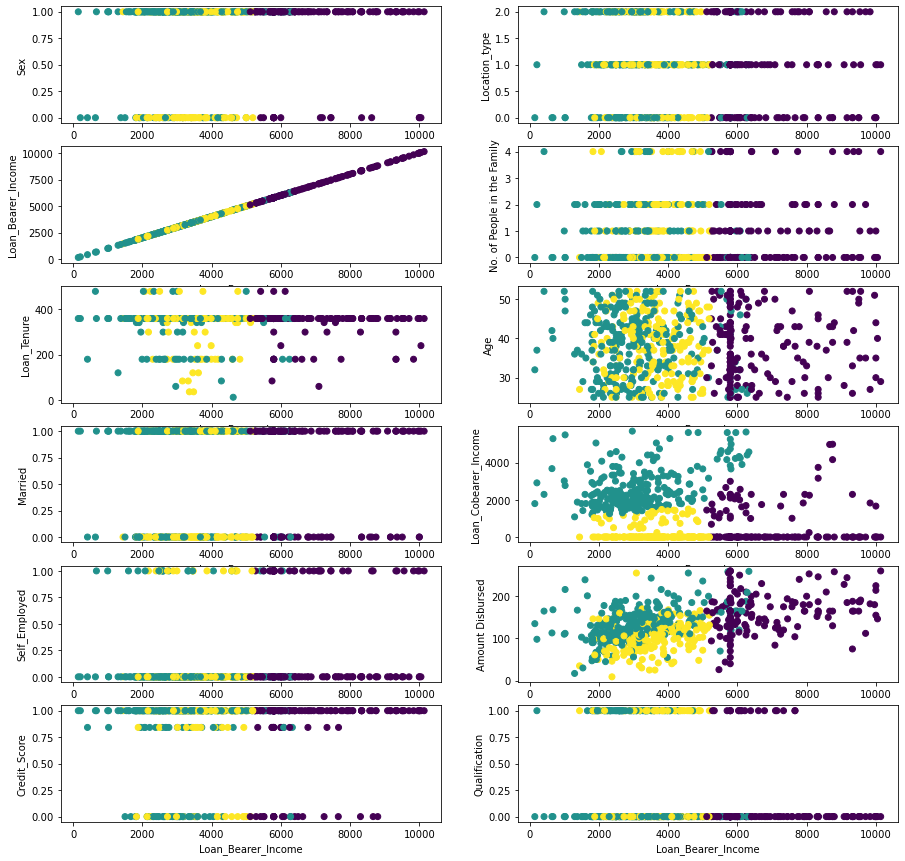

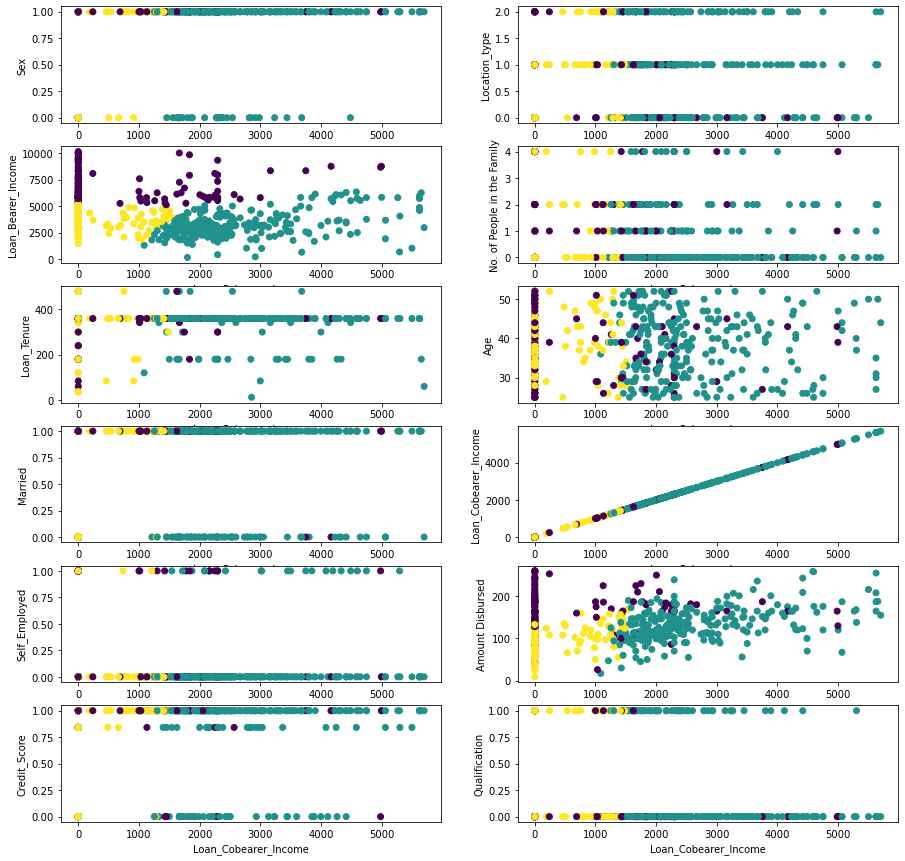

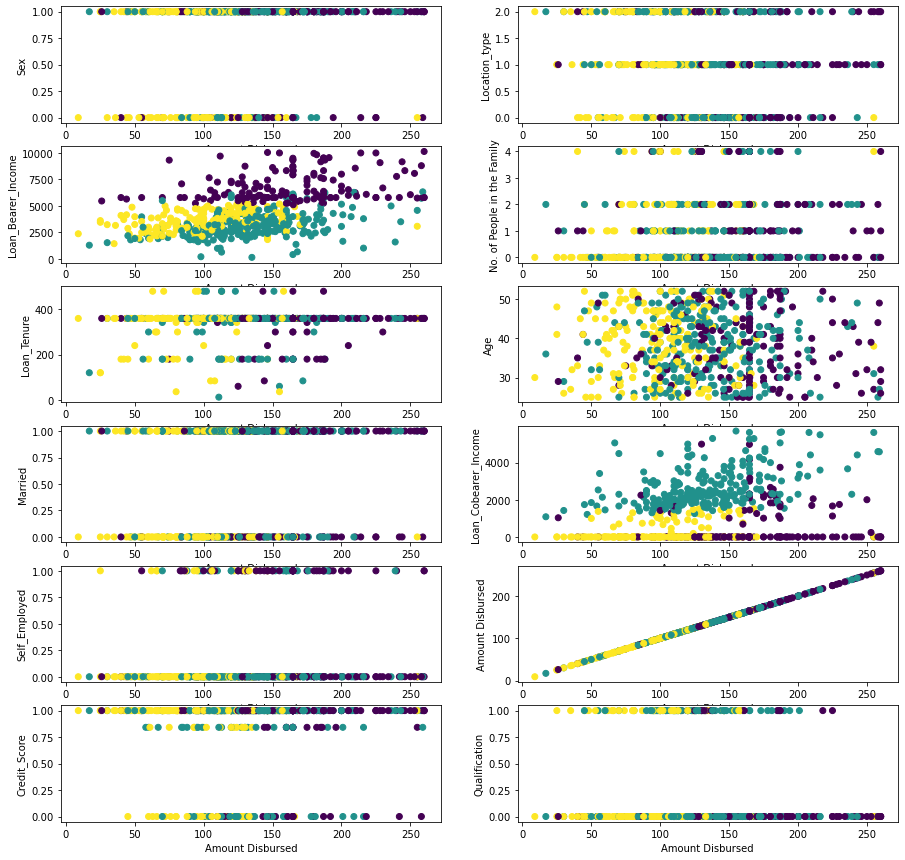

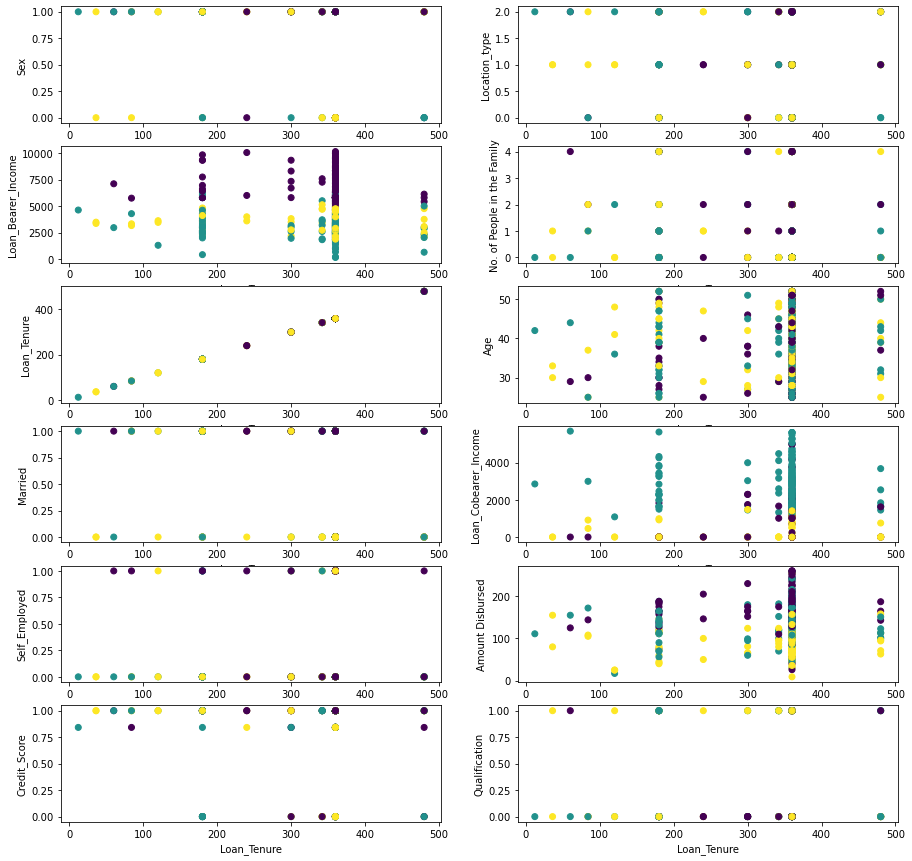

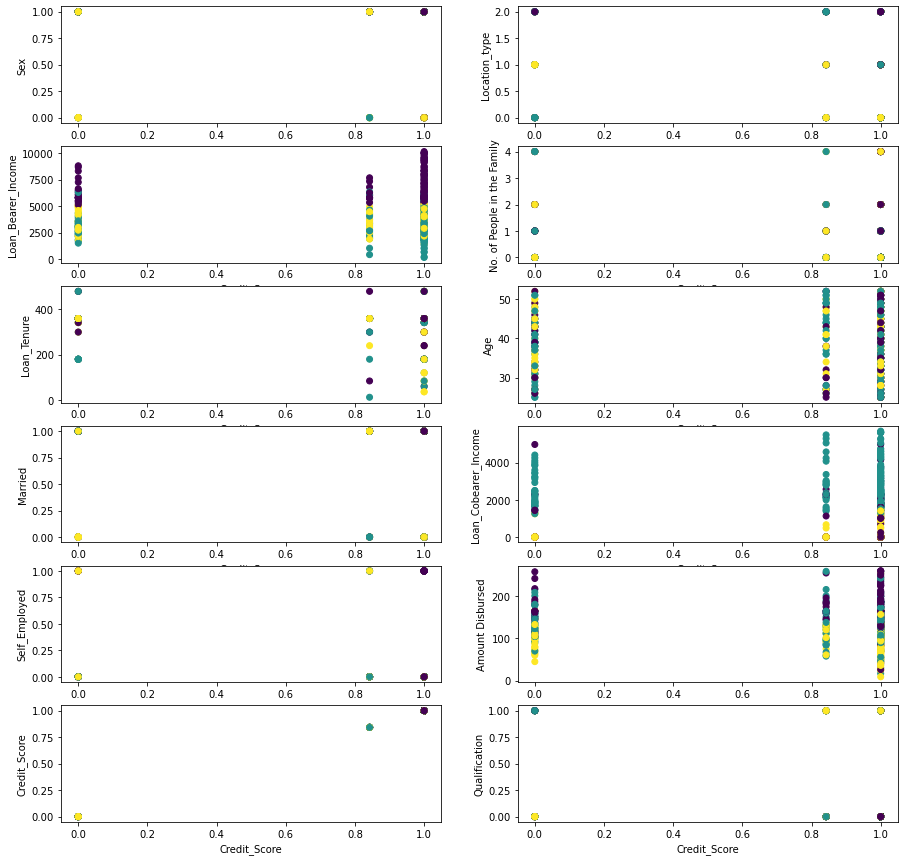

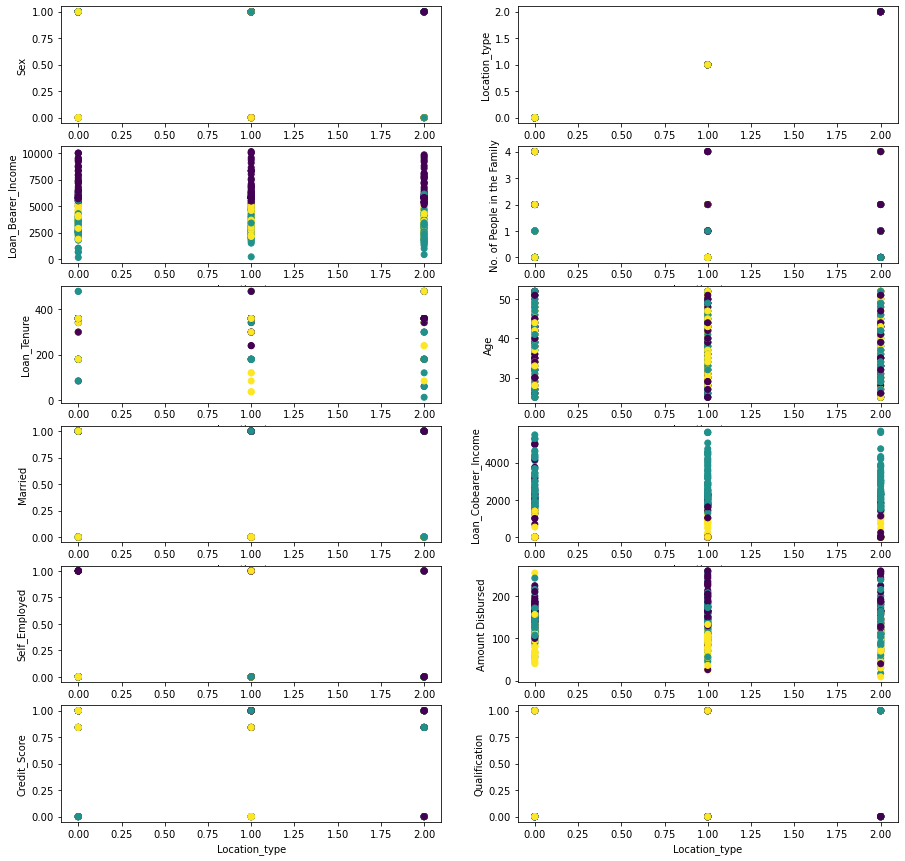

In [40]:
x = df.drop('Loan_Status',axis=1)
for col in x.columns:
    clustering(x,col,cluster)

In [41]:
new_df = df.join(pd.DataFrame(cluster,columns=['cluster']), how = 'left')

In [42]:
new_df

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,cluster
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2,1,0
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0,2
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1,2
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1,1
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,28,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1,2
610,1,33,1,4,0,0,4106.0,0.0,40.0,180.0,1.0,0,1,2
611,1,39,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1,0
612,1,47,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1,0


In [43]:
new_f = new_df.groupby('cluster')['Loan_Bearer_Income'].agg(['mean','median'])

In [44]:
new_f

,mean,median
cluster,,
0,6737.412121,6000.0
1,3149.437500,3000.0
2,3617.435233,3620.0


In [45]:
cluster_df = new_df.merge(new_f, on = 'cluster', how = 'left')
cluster_df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,cluster,mean,median
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2,1,0,6737.412121,6000.0
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0,2,3617.435233,3620.0
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1,2,3617.435233,3620.0
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1,1,3149.437500,3000.0
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1,0,6737.412121,6000.0


In [46]:
startifiedKfoldcv(cluster_df.drop('Loan_Status',axis=1),cluster_df['Loan_Status'])

,model_names,cv_score
0,RidgeClassifier,0.854839
1,AdaBoostClassifier,0.854839
2,LogisticRegression,0.838710
3,DecisionTreeClassifier,0.838710
4,XGBClassifier,0.838710
5,GradientBoostingClassifier,0.822581
6,RandomForestClassifier,0.693548
7,KNeighborsClassifier,0.645161
8,SVC,0.645161


In [47]:
CV_Post_HPT(cluster_df.drop('Loan_Status',axis=1),cluster_df['Loan_Status'])

,Model Name,CV Score,CV Stdev
0,RidgeClassifier,0.809572,0.033478
1,RandomForestClassifier,0.809572,0.035806
2,AdaBoostClassifier,0.809572,0.033478
3,XGBClassifier,0.809572,0.033478
4,GradientBoostClassifier,0.799762,0.029465
5,DecisionTreeClassifier,0.742597,0.069981
6,LogisticRegression,0.714913,0.049403
7,SVC,0.687308,0.005314
8,KNeighborsClassifier,0.630328,0.026723


Analysis :
1. there is no imrovement accuraacy after clustering

## Correlation Matrix

<AxesSubplot:>

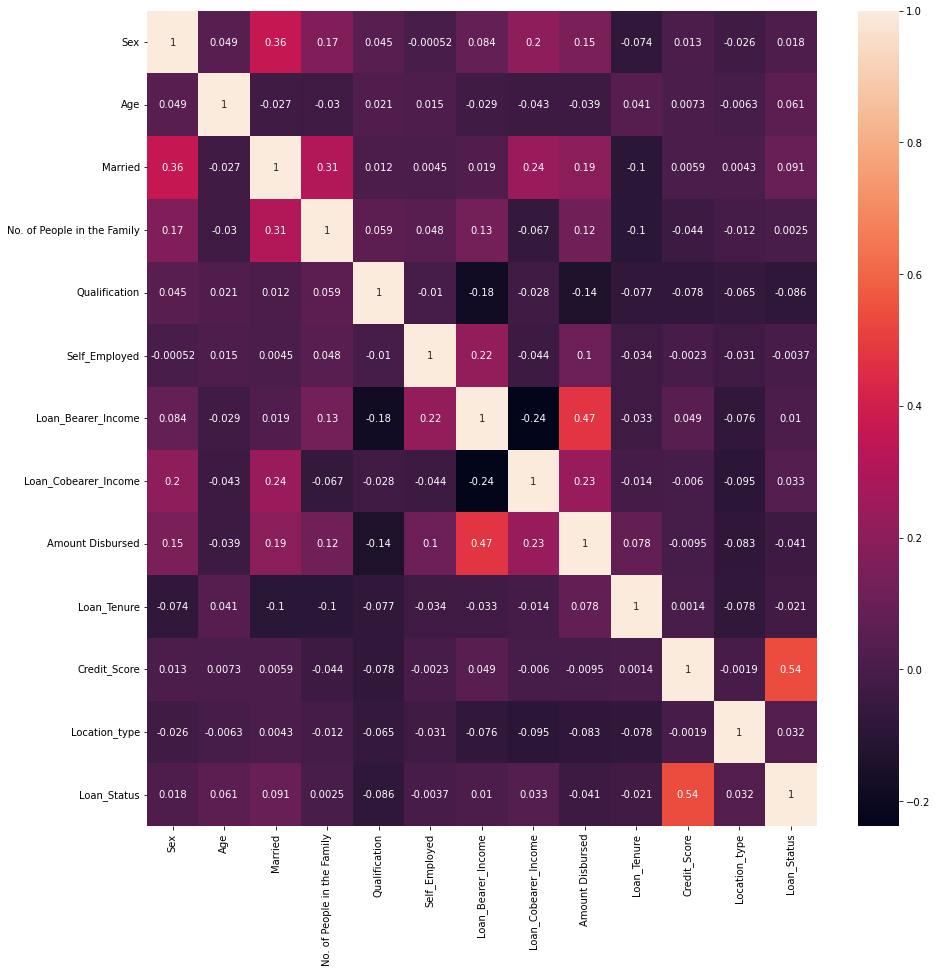

In [48]:
corr = df.corr() 
f,ax = plt.subplots(figsize =(15,15))
sns.heatmap(corr,annot=True)

Analysis :
1. Age,Qualification,Loan_Bearer_Income,Loan_Cobearer_Income,Loan_Tenure,Credit_Score,Location_Type,Age,Amount Disbursed is highly correlated with Loan_Status

## Feature Importance

In [49]:
df

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2,1
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,28,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,33,1,4,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,1,39,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,47,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [50]:
x_train,x_test,y_train,y_test = train_and_test_split(df,'Loan_Status')

In [51]:
x_train.shape

(429, 12)

In [52]:
x_test.shape

(185, 12)

In [53]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

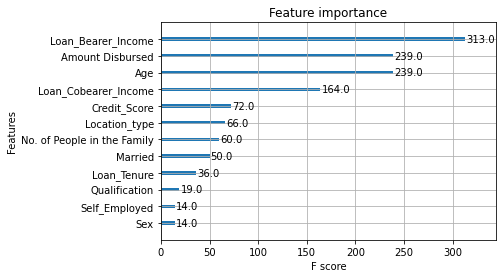

In [54]:
xgboost.plot_importance(xgb)

In [55]:
df.columns

Index(['Sex', 'Age', 'Married', 'No. of People in the Family', 'Qualification',
       'Self_Employed', 'Loan_Bearer_Income', 'Loan_Cobearer_Income',
       'Amount Disbursed', 'Loan_Tenure', 'Credit_Score', 'Location_type',
       'Loan_Status'],
      dtype='object')

In [56]:
fe_df = df[['Loan_Bearer_Income','Amount Disbursed','Age','Loan_Cobearer_Income','Credit_Score','Location_type','Loan_Status']]

In [57]:
CV_Post_HPT(fe_df.drop('Loan_Status',axis= 1),df['Loan_Status'])

,Model Name,CV Score,CV Stdev
0,RidgeClassifier,0.809572,0.033478
1,AdaBoostClassifier,0.809572,0.033478
2,XGBClassifier,0.809572,0.033478
3,LogisticRegression,0.807959,0.033200
4,GradientBoostClassifier,0.799815,0.034966
5,DecisionTreeClassifier,0.778556,0.031583
6,SVC,0.687308,0.005314
7,KNeighborsClassifier,0.630381,0.034052
8,RandomForestClassifier,NaN,NaN


Analysis :
1. after dropping 6 features still its given same accuraccy.

## Recursive Feature Elimination (RFE)

In [58]:
rfe_dfe = df
rfe = RFE(estimator= XGBClassifier())
rfe.fit(df.drop('Loan_Status',axis=1),df['Loan_Status'])
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True,  True, False])

In [59]:
df.columns

Index(['Sex', 'Age', 'Married', 'No. of People in the Family', 'Qualification',
       'Self_Employed', 'Loan_Bearer_Income', 'Loan_Cobearer_Income',
       'Amount Disbursed', 'Loan_Tenure', 'Credit_Score', 'Location_type',
       'Loan_Status'],
      dtype='object')

In [60]:
rfe_df = df[['Qualification','Self_Employed', 'Loan_Bearer_Income', 'Loan_Cobearer_Income','Loan_Tenure', 'Credit_Score','Loan_Status']]

In [61]:
CV_Post_HPT(rfe_df.drop('Loan_Status',axis= 1),df['Loan_Status'])

,Model Name,CV Score,CV Stdev
0,LogisticRegression,0.809572,0.033478
1,RidgeClassifier,0.809572,0.033478
2,XGBClassifier,0.809572,0.033478
3,AdaBoostClassifier,0.806293,0.032308
4,GradientBoostClassifier,0.796589,0.034045
5,DecisionTreeClassifier,0.783580,0.036727
6,SVC,0.687308,0.005314
7,KNeighborsClassifier,0.643363,0.026149
8,RandomForestClassifier,NaN,NaN


Analysis :
1. after dropping 5 features still its given same accuraccy.

# Learning Curve Analysis

In [62]:
def generatae_Learning_curve(model_name,estimator,x,y):
    train_size,train_score,test_score = learning_curve(estimator,x,y,cv=10)
    #print('train_size',train_size)
    #print('train_score',train_score)
    #print('test_score',test_score)
    train_score_maen = np.mean(train_score,axis=1)
    test_score_mean =  np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_maen,c = 'blue')
    plt.plot(train_size,test_score_mean,c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('Score')
    plt.title("Learning")
    plt.title("Learning Curve for "+model_name)
    plt.legend('Training Accuracy','Tesing Accuracy')

In [63]:
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2,1
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [64]:
x 

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,28,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0
610,1,33,1,4,0,0,4106.0,0.0,40.0,180.0,1.0,0
611,1,39,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2
612,1,47,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2


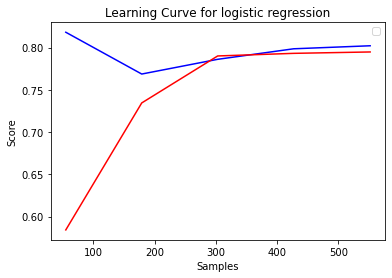

In [65]:
generatae_Learning_curve('logistic regression',LogisticRegression(),x,df['Loan_Status'])

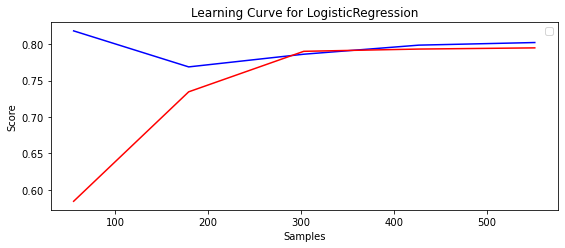

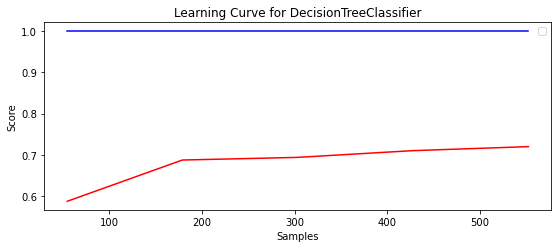

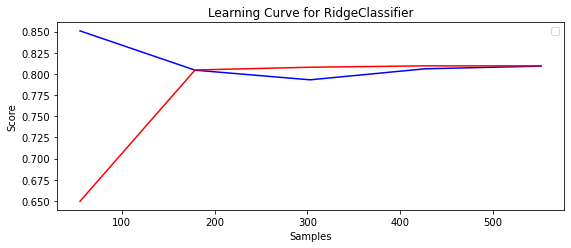

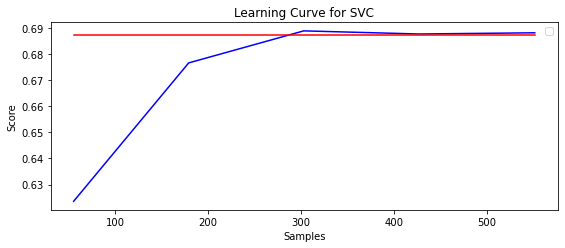

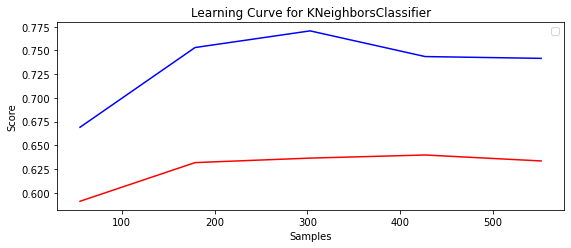

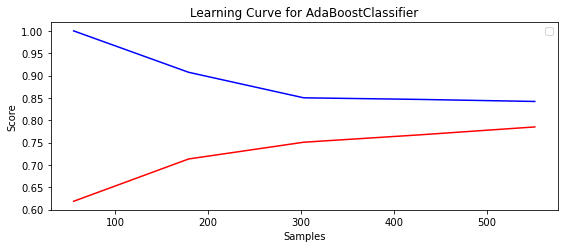

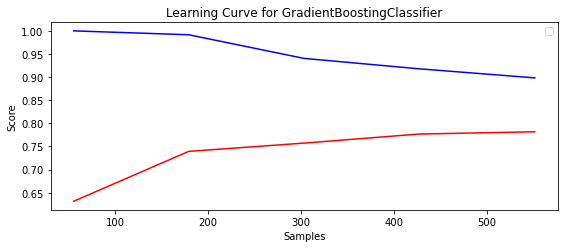

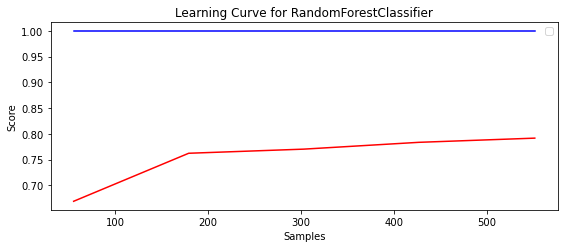

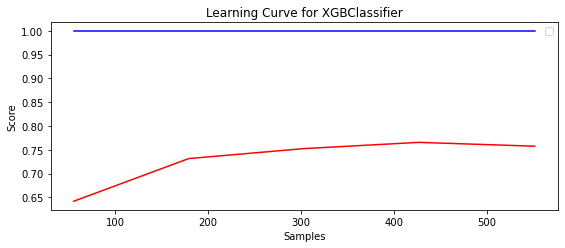

In [66]:
model_names = [LogisticRegression(),DecisionTreeClassifier(),RidgeClassifier(),SVC(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),XGBClassifier()]
for i,model in enumerate(model_names):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(5,2,i+1)
    generatae_Learning_curve(type(model).__name__,model,x,rfe_df['Loan_Status'])

## Model prediction on Unseen Data

In [67]:
x_train,x_test,y_train,y_test = train_and_test_split(rfe_df,'Loan_Status',testsize=0.2)
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [68]:
x_train.head()

,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Loan_Tenure,Credit_Score
333,0,0,5795.0,0.00,180.0,1.0
114,0,0,5050.0,0.00,360.0,1.0
281,0,0,3927.0,800.00,360.0,1.0
538,1,0,2917.0,536.00,360.0,1.0
402,0,0,2500.0,2297.25,360.0,1.0


In [69]:
test_data = [[0,1,2577.0,3750.0,360.0,1.0]]

In [70]:
model.predict(pd.DataFrame(test_data,columns=x_train.columns))

array([1])

In [71]:
df.head(153)

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,1,33,0,0,0,0,5849.0,0.0,108.0,360.0,1.0,2,1
1,1,34,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,31,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,33,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,48,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,35,0,0,0,0,10000.0,1666.0,225.0,360.0,1.0,0,0
149,1,35,1,0,0,0,4860.0,830.0,125.0,360.0,1.0,1,1
150,1,46,0,0,0,0,6277.0,0.0,118.0,360.0,0.0,0,0
151,1,52,1,0,0,1,2577.0,3750.0,152.0,360.0,1.0,0,1
